In [49]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import kurtosis

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (6,4)

In [38]:
class Datasets():
    
    def __init__(self,data, target_column_name):
        self.original_data = data
        self.X_Train = self.original_data.drop(target_column_name,axis=1)
        self.X_Train_Scaled = self.scale_data(self.X_Train, 'MinMax')
        self.Y_Train = self.original_data[target_column_name].copy()
        
    def scale_data(self, X, method='MinMax'):
        """
        This function will scale the data using Minmax function from Sklearn
        """
        if method == 'MinMax':
            scaler = MinMaxScaler()
        else:
            scaler = StandardScaler()
        X_t = scaler.fit_transform(X)
        X_t=pd.DataFrame(X_t,columns=[X.columns])
        return X_t

In [5]:
def run_lr_model(predictors, target):
    """
    Running Linear regression model using Statsmodel API
    """
    pred = sm.add_constant(predictors)
    model = sm.OLS(target, pred)
    results = model.fit()
    return print(results.summary())

### The dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio and newspaper. The sales are in thousands of units and the budget is in thousands of dollars.


<https://www.kaggle.com/ashydv/advertising-dataset>

In [6]:
data = pd.read_csv('advertising.csv')

In [7]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<AxesSubplot:>

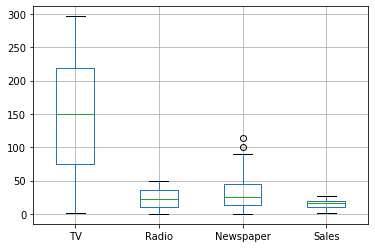

In [8]:
data.boxplot()

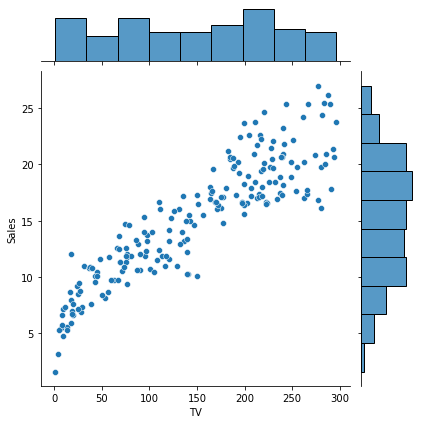

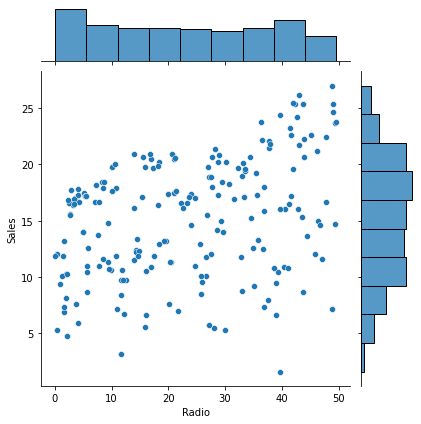

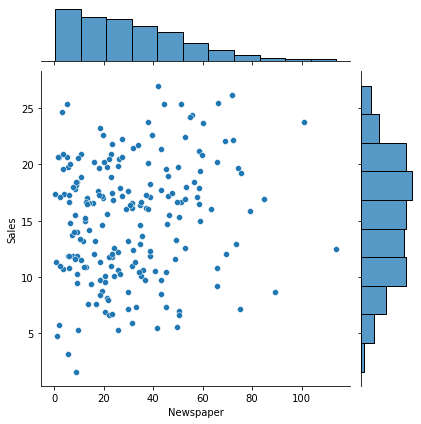

In [24]:
for col in [cols for cols in data.columns if cols != 'Sales']:
    sns.jointplot(data[col], data['Sales'], kind='scatter')

Spend in TV advertising is more correlated with Sales compared to other channels

In [47]:
data.shape

(200, 4)

In [39]:
datasets = Datasets(data, 'Sales')

In [45]:
run_lr_model(datasets.X_Train['TV'], datasets.Y_Train)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           7.93e-74
Time:                        15:26:18   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

In [48]:
run_lr_model(datasets.X_Train[['TV', 'Radio']], datasets.Y_Train)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Mon, 09 Aug 2021   Prob (F-statistic):          2.39e-100
Time:                        15:41:22   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0.290     15.952      0.0

In [46]:
run_lr_model(datasets.X_Train[['TV', 'Radio', 'Newspaper']], datasets.Y_Train)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           8.13e-99
Time:                        15:36:36   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

In [52]:
kurtosis(data)

array([-1.22589708, -1.2589619 ,  0.60352687, -0.65403539])